# Regression Modelling 10
## Removal of interaction terms

In [6]:
install.packages("tidyverse")
install.packages("gridExtra")
install.packages("nortest")

require(tidyverse)
require(gridExtra)
require("nortest")

homes <- read.table(url("http://jupyter-regressions.s3.eu-west-1.amazonaws.com/homes5.csv"), 
                           sep=",", header = T, stringsAsFactors = F)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
options(repr.plot.width=15, repr.plot.height=10)
theme <- theme(
        axis.text=element_text(size = rel(2)),
        axis.title=element_text(size = rel(2)),
        plot.title=element_text(size = rel(3))
    )
points <- geom_point(size=3)

In [8]:
head(homes)

Price,Floor,School,DHa
359.9,2.200,Redwood,0
249.7,1.868,Redwood,0
265.0,1.875,Redwood,0
349.0,2.000,Redwood,0
319.0,1.855,Harris,1
339.0,1.928,Redwood,0


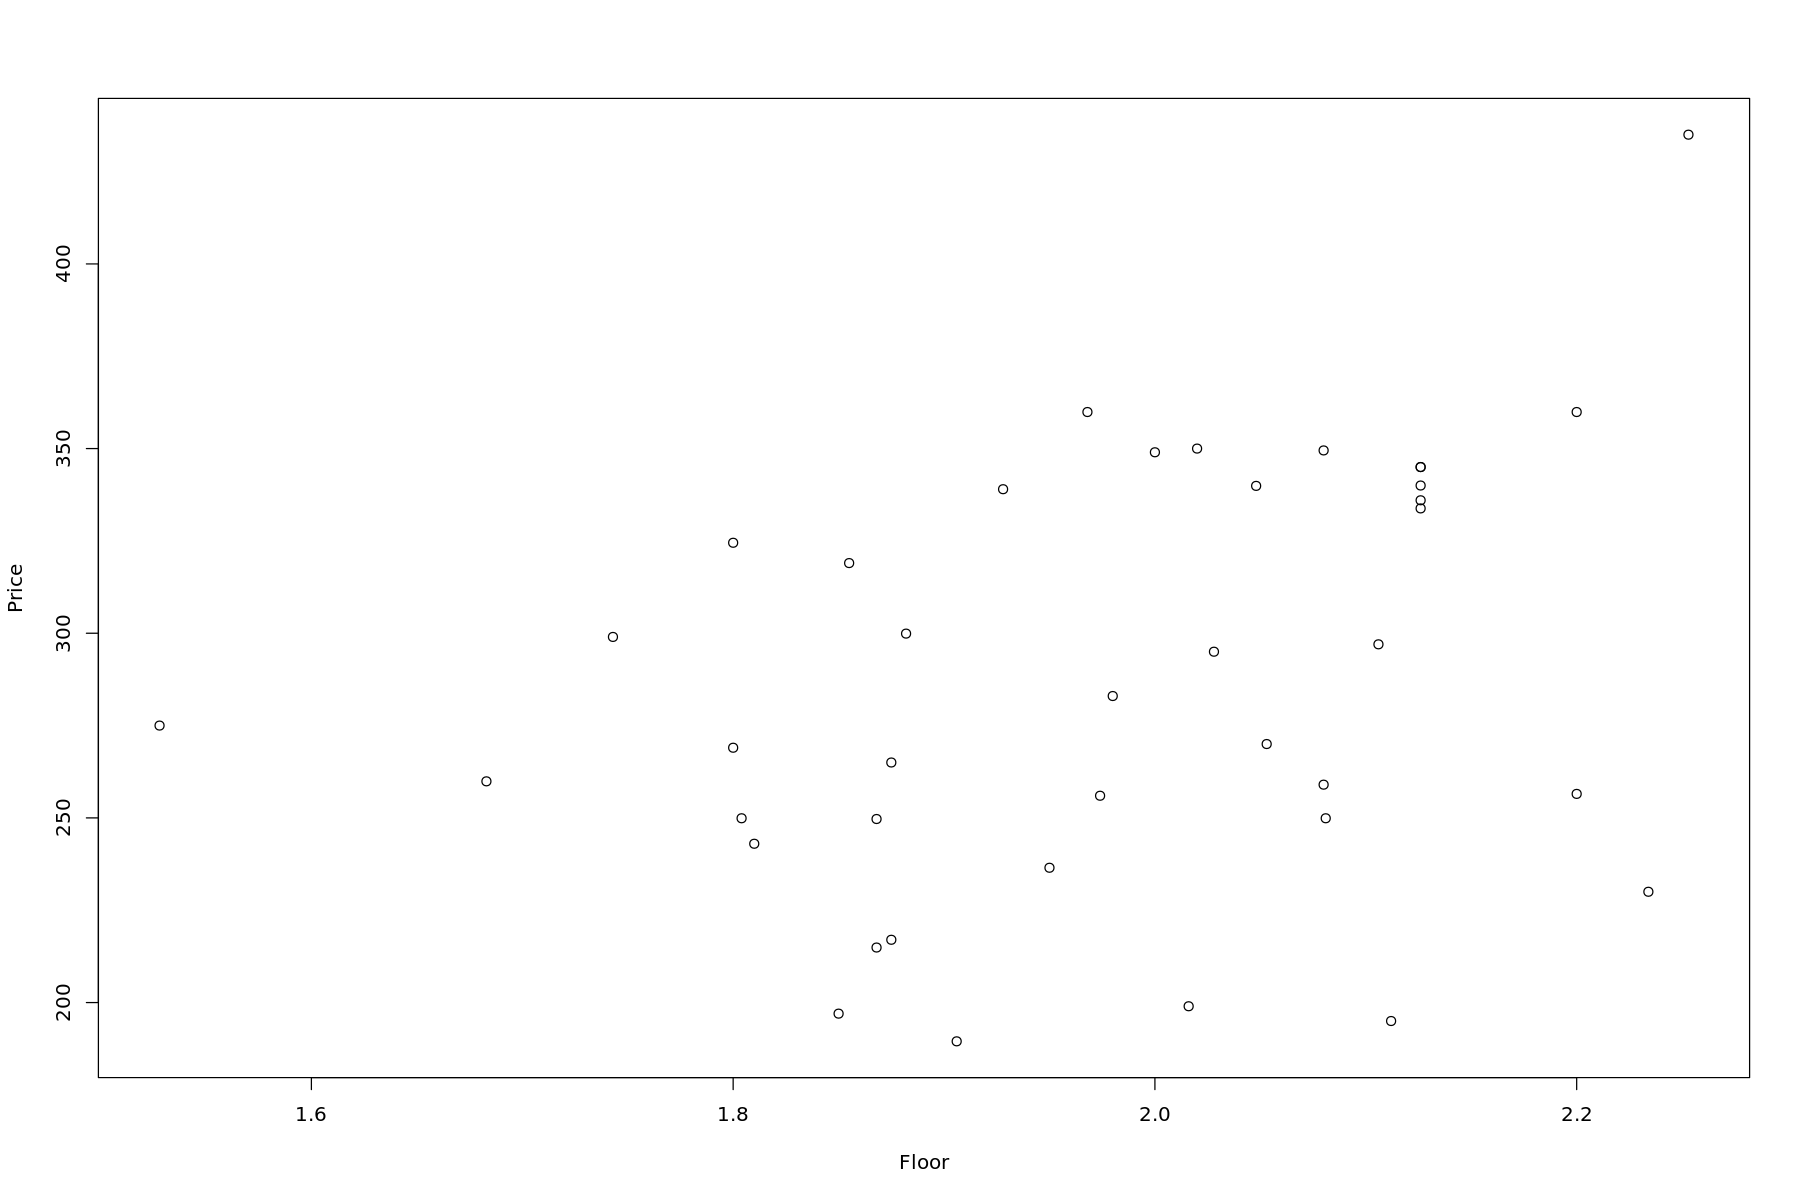

In [9]:
plot(Price~Floor, homes)

In [10]:
lmHomes <- lm(Price~DHa+Floor+DHa*Floor, homes)

predicted1 = predict(lmHomes, interval = "confidence")
fortifyHomes1 = fortify(lmHomes)
modHomes1 <- cbind(fortifyHomes1, predicted1)
    
ggplot(modHomes, aes(x=Floor, y=Price, group=DHa, fill=DHa, colour=DHa)) + 
    stat_smooth(aes(x=Floor, y=.fitted), se=FALSE) + 
    theme + points

ERROR: Error in ggplot(modHomes, aes(x = Floor, y = Price, group = DHa, fill = DHa, : object 'modHomes' not found


In [ ]:
summary(lmHomes)

**A P-Value of 0.91 on the Dha:Floor term confirms the visual interpretations that the slopes are the same for both neighbourhoods, therefor we can remove the interaction term.**

In [ ]:
lmHomes2 <- lm(Price~DHa+Floor+DHa, homes)

predicted2 = predict(lmHomes2, interval = "confidence")
fortifyHomes2 = fortify(lmHomes2)
modHomes2 <- cbind(fortifyHomes2, predicted2)
    
ggplot(modHomes2, aes(x=Floor, y=Price, group=DHa, fill=DHa, colour=DHa)) + 
    stat_smooth(aes(x=Floor, y=.fitted), se=FALSE) + 
    theme + points

In [ ]:
summary(lmHomes2)

In [ ]:
plot(lmHomes2)